# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること。

In [1]:
from sympy import *
from IPython.display import display
init_printing(use_unicode=True)

 # シンボル定義
a, b, x, y, z, t = symbols('a b x y z t')
f, g, h = symbols('f g h', cls=Function)

x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

# 簡約
このタイトル、simplification の訳なのだがどう訳すのが適切なのだろう？
単純化だとまた違う気もする。

## `simplify()`
そろそろ数学的な話もしていきたい。
シンボル操作系のいい機能として式を簡約できることがある。
Sympy も簡約系の関数がたくさんある。
`simplify()` は汎用的に使えるいい子。
いくつか例を見てみよう。

が次のようになる


----


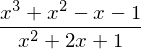

が次のようになる


----


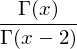

が次のようになる


In [3]:
display(sin(x)**2 + cos(x)**2)
print('が次のようになる')
display(simplify(sin(x)**2 + cos(x)**2))

print('----')
display((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))
print('が次のようになる')
display(simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)))

print('----')
display(gamma(x)/gamma(x - 2))
print('が次のようになる')
display(simplify(gamma(x)/gamma(x - 2)))

## `simplify()` の罠
「一番単純な結果」に変換してはくれる。
ただ「単純」が well-defined ではない。
次のコードを実行させてみるとイメージが掴めるだろう。

In [4]:
display(x**2 + 2*x + 1)
display(simplify(x**2 + 2*x + 1))

気分的には $(x+1)^2$ と因数分解した形にしてほしい。
しかし展開した形が選ばれてしまった。
ただそれならそれで直接因数分解させればよく `factor()` を使えばいい。

In [5]:
display(x**2 + 2*x + 1)
display(factor(x**2 + 2*x + 1))

## `simplify()` の罠その 2
必要以上に遅くなる可能性がある: 「最適な結果」を選ぶ前にいろいろな簡約を試してしまうからだ。
特定の操作をしてほしいならその関数を選ぶべきということ。
特定の関数を使うと結果もある程度ほしい結果への保証もある。
例えば有理数係数の多項式に `factor()` を使えば既約多項式に分解してくれる。

`simplify()` はインタラクティブに試してみるときに効果を発揮する。
特に複雑な式が出てきて簡約の結果が想像できない時、適当に `simplify()` してみて様子を掴むといいだろう。

## 多項式・有理式の簡約
関数を色々紹介していく。

### expand

In [7]:
display((x + 1)**2)
print('が次のようになる')
display(expand((x + 1)**2))
print('----')

display((x + 2)*(x - 3))
print('が次のようになる')
display(expand((x + 2)*(x - 3)))

が次のようになる


----


が次のようになる


`expand()` は多項式を単項式の和に直してくれる.
展開しているわけで一般には式を元の式より大きくしていることになる.
もちろん小さくなるケースもある.

In [8]:
display((x + 1)*(x - 2) - (x - 1)*x)
print('が次のようになる')
display(expand((x + 1)*(x - 2) - (x - 1)*x))

が次のようになる


### factor
`factor()` は多項式を有理数係数のレベルで因数分解する.

In [9]:
display(x**3 - x**2 + x - 1)
print('が次のようになる')
display(factor(x**3 - x**2 + x - 1))
print('----')
display(x**2*z + 4*x*y*z + 4*y**2*z)
print('が次のようになる')
display(factor(x**2*z + 4*x*y*z + 4*y**2*z))

が次のようになる


----


が次のようになる


`factor_list()` という関数もある.

In [11]:
display(x**2*z + 4*x*y*z + 4*y**2*z)
print('が次のようになる')
display(factor(x**2*z + 4*x*y*z + 4*y**2*z))
print('factor_list の結果')
display(factor_list(x**2*z + 4*x*y*z + 4*y**2*z))

が次のようになる


factor_list の結果


多項式でなくても `factor()` や `expand()` は使える.

In [14]:
display((cos(x) + sin(x))**2)
print('が expand() で次のようになる')
display(expand((cos(x) + sin(x))**2))
print('----')

display(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)
print('が factor() で次のようになる')
display(factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2))

が expand() で次のようになる


----


が factor() で次のようになる


### `collect()`
`collect()` は同じべきの項を集める.
例を見た方が早い.
また `collect()` は `.coeff()` メソッドと組み合わせると特に役に立つ.

In [18]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
display(expr)
print('が次のようになる')
collected_expr = collect(expr, x)
display(collected_expr)
print('.coeff(x, 2) を当てた結果')
display(collected_expr.coeff(x, 2))
print('.coeff(x, 1) を当てた結果')
display(collected_expr.coeff(x, 1))

が次のようになる


.coeff(x, 2) を当てた結果


.coeff(x, 1) を当てた結果


### `cancel()`
`cancel()` は有理式を取る.
これも例を見よう.
`factor()` は完全に因数分解するので `cancel()` と同じようにも使える.
しかし簡約した形だけに興味があるなら `cancel()` の方が効率がいい.

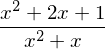

が次のようになる


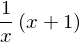

----


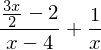

が次のようになる


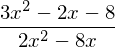

----


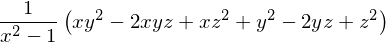

が次のようになる


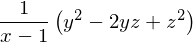

In [20]:
display((x**2 + 2*x + 1)/(x**2 + x))
print('が次のようになる')
display(cancel((x**2 + 2*x + 1)/(x**2 + x)))
print('----')

expr = 1/x + (3*x/2 - 2)/(x - 4)
display(expr)
print('が次のようになる')
display(cancel(expr))
print('----')

expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
display(expr)
print('が次のようになる')
display(cancel(expr))

### `apart()`
`apart()` は有理式を部分分数分解してくれる.

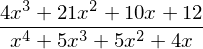

が次のようになる


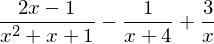

In [21]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
display(expr)
print('が次のようになる')
display(apart(expr))

## 三角関数の簡約
Sympy は Python 本体の命名規則に倣って逆三角関数は `acos()` のように a をつけて書く.

In [3]:
display(acos(x))
display(cos(acos(x)))
display(asin(1))

### `trigsimp()`
三角恒等式に関する式の簡約は `trigsimp()` を使えばいい.
根本的に三角関数を英語で trigonometric functions と呼ぶこと自体に慣れない人が多そうなので,
まずはこの英語を覚えるところからはじめよう.

がこうなる:


----


がこうなる:


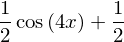

----


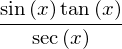

がこうなる:


In [5]:
display(sin(x)**2 + cos(x)**2)
print('がこうなる:')
display(trigsimp(sin(x)**2 + cos(x)**2))
print('----')

display(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)
print('がこうなる:')
display(trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4))
print('----')

display(sin(x)*tan(x)/sec(x))
print('がこうなる:')
display(trigsimp(sin(x)*tan(x)/sec(x)))

`trigsimp()` は双曲線関数にも使える.

がこうなる:


----


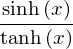

がこうなる:


In [7]:
display(cosh(x)**2 + sinh(x)**2)
print('がこうなる:')
display(trigsimp(cosh(x)**2 + sinh(x)**2))
print('----')

display(sinh(x)/tanh(x))
print('がこうなる:')
display(trigsimp(sinh(x)/tanh(x)))

`simplify()` と同じで `trigsimp()` も「ベスト」な結果を得るまで計算をくり返すので同じデメリットがある.

### `expand_trig()`
倍角の公式のように三角関数の展開をしたいなら `expand_trig()` を使う.

がこうなる:


----


がこうなる:


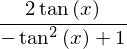

----


In [9]:
display(sin(x + y))
print('がこうなる:')
display(expand_trig(sin(x + y)))
print('----')

display(tan(2*x))
print('がこうなる:')
display(expand_trig(tan(2*x)))
print('----')

多項式のときと同じような話がある: `expand_trig()` は三角関数の式を大きくする傾向があり,
`trigsimp()` は小さくする傾向がある.

In [11]:
display(sin(x)*cos(y) + sin(y)*cos(x))
print('がこうなる:')
display(trigsimp(sin(x)*cos(y) + sin(y)*cos(x)))

がこうなる:


## べき
Sympy の話の前に数学のべき乗則を復習.

1. $(x^{a} x^{b} = x^{a+b})$.
2. $x^a y^{a} = (xy)^{a}$.
3. $(x^a)^{b} = x^{ab}$.

2 番目の式は $x = y = -1$, $a = 1/2$ のときなどに微妙なことがある.
$x,y$ が正で $a$ が実数なら問題ない.

3 番目の式は $x=y=−1$, $a = 2$, $b = 1/2$ のときなどに微妙:
$(x^a)^b = 1$, $x^{ab} = -1$ だから.

Sympy は上のような一般に正しくない簡約をしないのできちんと覚えておく必要がある.
細かいことはあとでやることにしてとりあえず次の点に注意する.

- デフォルトで SymPy のシンボルは複素数と仮定されている.
  したがって全ての複素数に対して成り立つ場合にだけ簡約がはたらく.
- シンボルは `symbols()` に条件を与えれば適切な設定で動くようになる.
  以下しばらく次の設定でコードを書いていく.

### 変数の追加定義

In [12]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

### 注意
SymPy では `sqrt(x)` は `x**Rational(1, 2)` のショートカット. 

In [14]:
display(sqrt(x) == x**Rational(1, 2))

True

### `powsimp()`
`powsimp()` は上の恒等式の 1, 2 で左辺から右辺への変換をしてくれる.

In [15]:
display(x**a*x**b)
print('がこうなる:')
display(powsimp(x**a*x**b))
print('----')

display(x**a*y**a)
print('がこうなる:')
display(powsimp(x**a*y**a))

がこうなる:


----


がこうなる:


`powsimp()` は複素数まで含めて一般に正しくない式は簡約してくれない.

In [16]:
display(t**c * z**c)
display(powsimp(t**c * z**c))

さっき書いたように簡約には面倒な話がいろいろある.
しかしそれに煩わされたくないなら `force = True` フラグを立てることもできる.

In [4]:
display(t**c * z**c)
display(powsimp(t**c*z**c, force=True))

特に整数や有理数絡みの話では 2 番目の恒等式が自動で適用される.
これは `powsimp()` を undo できないことを意味する.

In [5]:
print((z*t)**2)
print('がこうなる:')
display((z*t)**2)
print('----')

print(sqrt(x*y))
print('がこうなる:')
display(sqrt(x*y))
print('----')

display(powsimp(z**2*t**2))
display(powsimp(sqrt(x)*sqrt(y)))

t**2*z**2
がこうなる:


----
sqrt(x)*sqrt(y)
がこうなる:


----


## `expand_power_exp` / `expand_power_base`
`expand_power_exp()` と `expand_power_base()` は最初の恒等式のうち 1 と 2 に関する関数で,
それぞれ左辺から右辺に変形させる.

In [6]:
display(expand_power_exp(x**(a + b)))
display(expand_power_base((x*y)**a))

`powsimp()` と同じく, 適当ではない場合は最初の恒等式 2 を適用しない.
`force=True`で適用を強制させられるのも同じ.

In [10]:
display(expand_power_base((z*t)**c))
display(expand_power_base((z*t)**c, force=True))

べきが数値なら恒等式 2 と同じく恒等式 1 も自動的に適用される.
そのため `expand_power_exp()` は undo できない.

In [14]:
display(x**2*x**3)
display(expand_power_exp(x**2*x**3))
display(expand_power_exp(x**5))

### powdenest
`powdenest()` は最初の恒等式の 3 の左辺から右辺への変換だ.

In [15]:
display(powdenest((x**a)**b))

前と同じく所与の仮定のもとで正しくないなら恒等式は適用されない.
そして `force=True` をつければ変換を強制できる.

In [17]:
display(powdenest((z**a)**b))
display(powdenest((z**a)**b, force=True))

## 指数関数と対数関数
Python や他の大多数のプログラミング言語のように SymPy では $\log$ は自然対数を表す.
Sympy は $\ln = \log$ のエイリアスがある.

In [19]:
display(ln(x))

対数にも指数と同じような問題がある.
ここには次の 2 つの主な恒等式がある.

1. $\log (xy) = \log(x) + \log (y)$
2. $\log (x^n) = n \log (x)$

どちらの恒等式も任意の複素数 $x, y$ については正しくない.
もちろん $x, y > 0$ で $n \in \mathbb{R}$ なら問題ない.

### 対数用の変数定義

In [22]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

先程までと同じく $z$ と $t$ は追加の仮定なしのシンボルとしよう.
$x$ が実数なら $\log e^{x} = x$ となるが $x$ が一般の複素数なら成立しない.

## `expand_log`
対数に関する恒等式 1 と 2 を左辺から右辺に向けて適用させたいなら `expand_log()` を使う.
いつも通り不適切な場合には恒等式を適用させない.

In [24]:
display(expand_log(log(x*y)))
display(expand_log(log(x/y)))
display(expand_log(log(x**2)))
display(expand_log(log(x**n)))
display(expand_log(log(z*t)))

`powsimp()` や `powdenest()` と同じく `expand_log()` に仮定を無視する `force=True` オプションがある.

In [26]:
display(expand_log(log(z**2)))
display(expand_log(log(z**2), force=True))

### `logcombine`
恒等式 1 と 2 を左辺から右辺に向けて適用させるには `logcombine()` を使う.

In [28]:
display(logcombine(log(x) + log(y)))
display(logcombine(n*log(x)))
display(logcombine(n*log(z)))

`logcombine()` にも仮定を無視する `force=True` オプションがある.

In [29]:
display(logcombine(n*log(z), force=True))

## 特殊関数
SymPy は組み合わせ論的な関数から数理物理で使うような関数までいろいろな特殊関数も扱える.
Sympy で扱える関数のリストは[ここ](http://docs.sympy.org/latest/modules/functions/index.html#functions-contents)を見ること.
チュートリアルとしてはいくつかの特殊関数を紹介する.
まずは必要なシンボル定義から.

### 特殊関数用の変数定義

In [4]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

### `factorial()`

`factorial()` は階乗を表す.
特に `factorial(n)` は $n! = 1 \cdots 2 \cdots (n-1) \cdots n$ を表す.

In [5]:
display(factorial(n))

### `binomial()`

`binomial()` は二項係数を表す.
特に `binomial(n, k)` は $\begin{pmatrix} a \\ b \end{pmatrix}$ を表す.

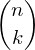

In [6]:
display(binomial(n, k))

### `gamma()`

ガンマ関数 `gamma()` もある.

In [7]:
display(gamma(z))

### 一般化超幾何関数 `hyper()`
一般化された超幾何関数が `hyper()`.
`hyper([a_1, ..., a_p], [b_1, ..., b_q], z)` は次の式を表している: ${}_pF_q\left(\begin{matrix} a_1, \dots, a_p \\ b_1, \dots, b_q \end{matrix}\middle| z \right)$.
よくあるのは ${}_2F_1$ でこれがふつうの超幾何関数.

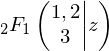

In [11]:
display(hyper([1, 2], [3], z))

### `rewrite()`
`expr.rewrite(function)` を使えば特殊関数をいろいろ書き換えられる.
具体例を見るのが早い.
さらに詳しくは公式の[ここ](http://docs.sympy.org/latest/tutorial/manipulation.html#tutorial-manipulation)を見てみよう.
そのうち紹介する予定ではある.

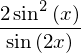

In [12]:
display(tan(x).rewrite(sin))
display(factorial(x).rewrite(gamma))

### `expand_func()`
ある恒等式に基づいて特殊関数を展開したいなら `expand_func()` を使う.
これも例を見るのが早い.

In [13]:
display(expand_func(gamma(x + 3)))

### `hyperexpand()`
わかりやすい関数で一般化超幾何関数 `hyper()` を表現したいなら `hyperexpand()` を使おう.
`hyperexpand()` はもっと一般の Meijer G-function にも使える.
これについては公式の [ここ](http://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.hyper.meijerg)参照.
そのうち紹介したい.

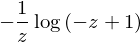

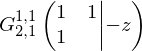

In [15]:
display(hyperexpand(hyper([1, 1], [2], z)))
expr = meijerg([[1],[1]], [[1],[]], -z)
display(expr)
display(hyperexpand(expr))

### `combsimp()`
組み合わせ関係の式を簡約したいなら `combsimp()` を使う.
`combsimp()` はガンマ関数も簡約できる.

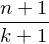

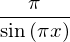

In [16]:
display(combsimp(factorial(n)/factorial(n - 3)))
display(combsimp(binomial(n+1, k+1)/binomial(n, k)))
display(combsimp(gamma(x)*gamma(1 - x)))

## 例: 連分数
連分数は数の次のような表記のことだ.
\begin{align}
 a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{ \ddots + \cfrac{1}{a_n}}}}.
\end{align}
ここで $a_0, \ldots, a_n$ は整数で $a_1, \ldots, a_n$ は正.
本来連分数は無限に続く.
もちろんコンピュータでは扱いきれないのでここでは有限の連分数だけを議論する.

上の形の連分数はよく次の形で書き表される: $[a_0; a_1, \ldots, a_n]$.
このリストを連分数に変換する関数を書いておく.

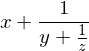

In [4]:
def list_to_frac(l):
    expr = Integer(0)
    
    # リストの後ろから扱うのがポイント
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr

    # a_0 だけ別に扱う
    return l[0] + expr

display(list_to_frac([x, y, z]))

元が Python の整数であったとしても `Integer(0)` を使うことで結果を常に Sympy のオブジェクトにしておける.

In [19]:
display(list_to_frac([1, 2, 3, 4]))

シンボリックな連分数を作ろう.
実は `symbols()` 関数は略記法を持っている.
`symbols('a0:5')` はシンボル `a0`, `a1`,..., `a5` を作る.

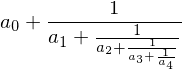

In [5]:
syms = symbols('a0:5')
display(syms)
a0, a1, a2, a3, a4 = syms
frac = list_to_frac(syms)
display(frac)

連分数をそのまま書くのにはこれが便利.
復習も兼ねて `cancel()` でこれをふつうの分数にしてみよう.

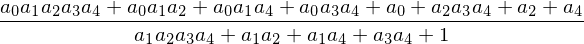

In [22]:
frac = cancel(frac)
display(frac)

次に `cancel()` で得られる分数を連分数に変換することを考えてみよう.
連分数は再帰的な $c + \frac{1}{f}$ という構造を持っていることに注目する.
ポイントは $c$ に関する部分分数展開だ.
`apart()` をうまく使っていく.

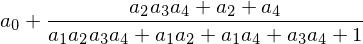

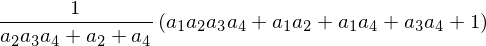

In [7]:
l = []
frac = apart(frac, a0)
display(frac)

l.append(a0)
frac = 1/(frac - a0)
display(frac)

これをくり返していく.

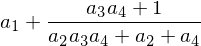

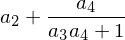

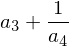

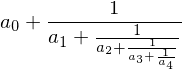

In [9]:
frac = apart(frac, a1)
display(frac)

l.append(a1)
frac = 1/(frac - a1)
frac = apart(frac, a2)
display(frac)

l.append(a2)
frac = 1/(frac - a2)
frac = apart(frac, a3)
display(frac)

l.append(a3)
frac = 1/(frac - a3)
frac = apart(frac, a4)
display(frac)

l.append(a4)
display(list_to_frac(l))